In [1]:
#imports
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def umap_projection (df, data_title = "", n_components = 2 ):
    
    '''
    This function reduces a multi feature datasets to a datasets with n_components using umap. 
    It accepts a dataframe, data title and n_components.
    '''
    
    
    embedding = umap.UMAP(n_neighbors=15,
                      metric='correlation', 
                      n_components = n_components).fit_transform(df)
    
    if n_components == 2:
        plt.scatter(embedding[:, 0], embedding[:, 1],)
        plt.gca().set_aspect('equal', 'datalim')
        plt.title('UMAP projection of the {a} data.'.format(a = data_title))
        plt.savefig(fname = data_title,dpi=1200)
    
    return pd.DataFrame(embedding)


Importing the datasets

In [3]:

        
dico = pd.read_json("dico_features.json")


# Punch Data 

Gegenhalter = dico.iloc[:,28:35]

Niederhalter = dico.iloc[:,35:56]
Niederhalter_1 = Niederhalter.iloc[:,0:7]
Niederhalter_2 = Niederhalter.iloc[:,7:14]
Niederhalter_4 = Niederhalter.iloc[:,14:22]

Stempel = dico.iloc[:,70:98]
Stempel_1 = Stempel.iloc[:, 0:7]
Stempel_2 = Stempel.iloc[:, 7:14]
Stempel_3 = Stempel.iloc[:, 14:21]
Stempel_4 = Stempel.iloc[:, 21:28]



# Coil Data

coil_data = dico.iloc[:,103:116]
coil_data = pd.DataFrame(coil_data).fillna(value = 0, )


UMAP Projection of data

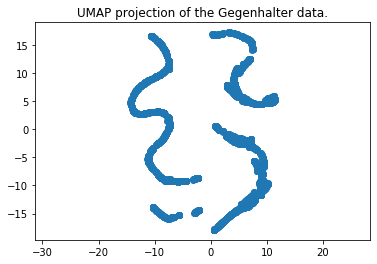

In [4]:

# Gegenhalter
Gegenhalter_umap = umap_projection(df = Gegenhalter, data_title= 'Gegenhalter')



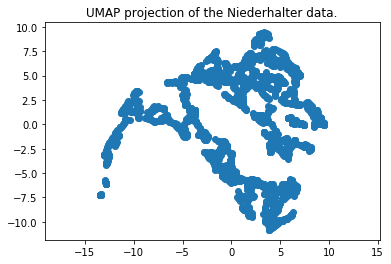

In [5]:

#Niederhalter
Niederhalter_umap = umap_projection(df = Niederhalter, data_title= 'Niederhalter')


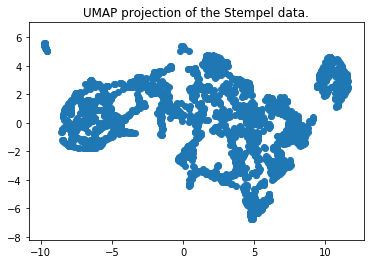

In [6]:

# Stempel
Stempel_umap = umap_projection(df = Stempel, data_title= "Stempel")


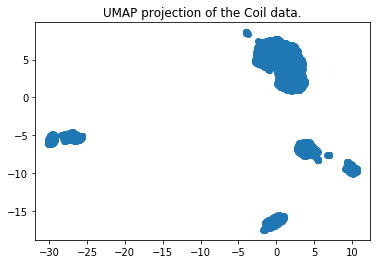

In [7]:
# coil Data
coil_data_umap = umap_projection(df = coil_data, data_title= 'Coil', n_components=2)


/Users/youpele/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 9 separate connected components using meta-embedding (experimental)
  n_components


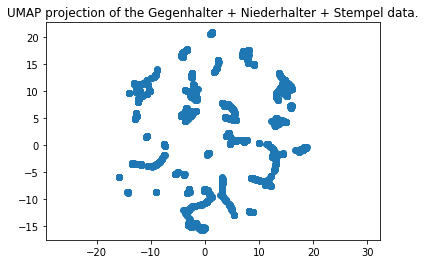

In [8]:
#Gegenhalter + Niederhalter + Stempel
Ge_Nie_Stem = pd.concat([Gegenhalter, Niederhalter, Stempel], axis=1)
Ge_Nie_Stem_umap = umap_projection(df = Ge_Nie_Stem, 
                                   data_title= 'Gegenhalter + Niederhalter + Stempel',n_components=10)

Ge_Nie_Stem_umap_2 = umap_projection(df = Ge_Nie_Stem_umap, 
                                   data_title= 'Gegenhalter + Niederhalter + Stempel',n_components=2)


Correlation Matrices with coil data

In [9]:


def corrMatrix(df, data_title = "", excel_export = "no"):
    
    """
    This function accepts a dataframe, merge it with the coil data and returns a correlation matrix.
    """
    joining = pd.concat([df, coil_data], axis =1)
    corrMatrix = joining.corr()
    
    plt.matshow(corrMatrix)
    plt.show()
    
    if excel_export == "yes":
        corrMatrix.to_excel(str(data_title)+".xlsx")
    
    return corrMatrix

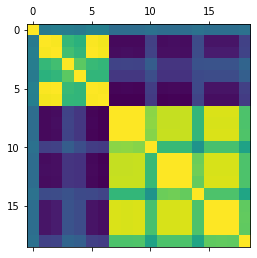

In [10]:

#Gegenhalter
Gegenhalter_corr = corrMatrix(Gegenhalter, data_title="Gegenhalter_corr")

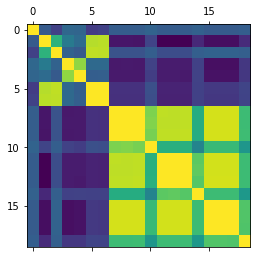

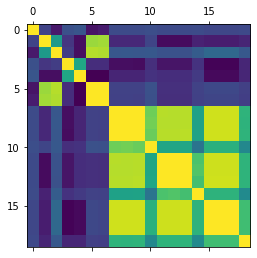

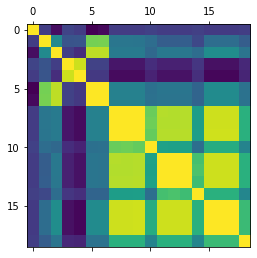

In [11]:
# Niederhalter 
Niederhalter_1_corr = corrMatrix(Niederhalter_1, data_title="Niederhalter_1_corr")
Niederhalter_2_corr = corrMatrix(Niederhalter_2, data_title="Niederhalter_2_corr")
Niederhalter_4_corr = corrMatrix(Niederhalter_4, data_title="Niederhalter_4_corr")


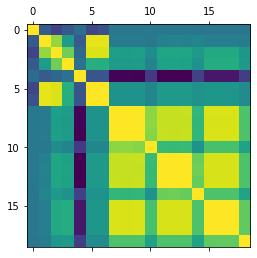

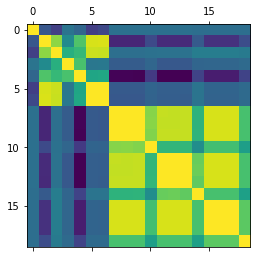

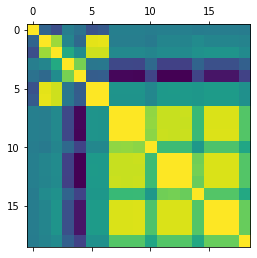

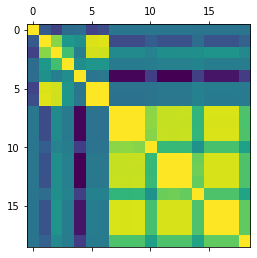

In [12]:
# Stempel 
Stempel_1_corr = corrMatrix(Stempel_1, data_title="Stempel_1_corr")
Stempel_2_corr = corrMatrix(Stempel_2, data_title="Stempel_2_corr")   
Stempel_3_corr = corrMatrix(Stempel_3, data_title="Stempel_3_corr")
Stempel_4_corr = corrMatrix(Stempel_4, data_title="Stempel_4_corr")



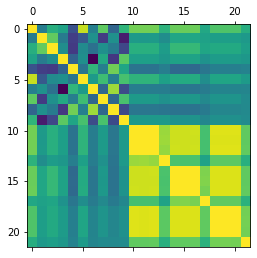

In [13]:
#Gegenhalter + Niederhalter + Stempel
Ge_Nie_Stem_umap_corr = corrMatrix(Ge_Nie_Stem_umap, 
                                   data_title="Ge_Nie_Stem_umap_corr")